In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [3]:
df_vendas = pd.DataFrame(dados_vendas)

In [4]:
df_vendas['mes_numero'] = range(1, 13)

In [5]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         12 non-null     object
 1   vendas      12 non-null     int64 
 2   mes_numero  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [6]:
df_vendas.head(12)

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [7]:
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2_score(y_pred, y_test)

0.8921492516779517

In [11]:
mean_squared_error(y_test, y_pred)

np.float64(960.4949940488656)

In [12]:
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 1972.463768115942
Coeficiente: [115.57971014]


In [13]:
# Previsão vendas Dezembro
vendas_zemebro = model.predict([[12]])
print(f"Previsão de vendas para Dezembro: {round(vendas_zemebro[0], 2)}")

Previsão de vendas para Dezembro: 3359.42


/home/matheusramos/.local/share/virtualenvs/SCIKIT_LEARN_CHALLENGE-oYD_Dh0v/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


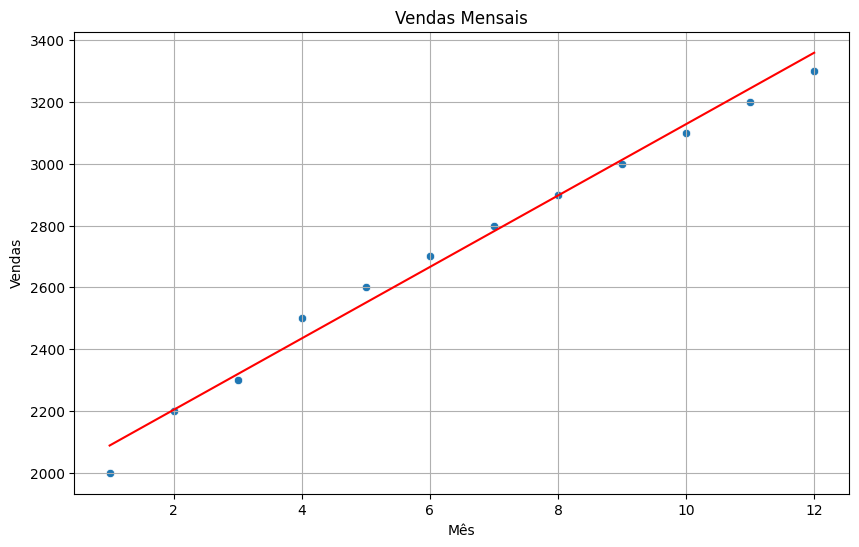

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

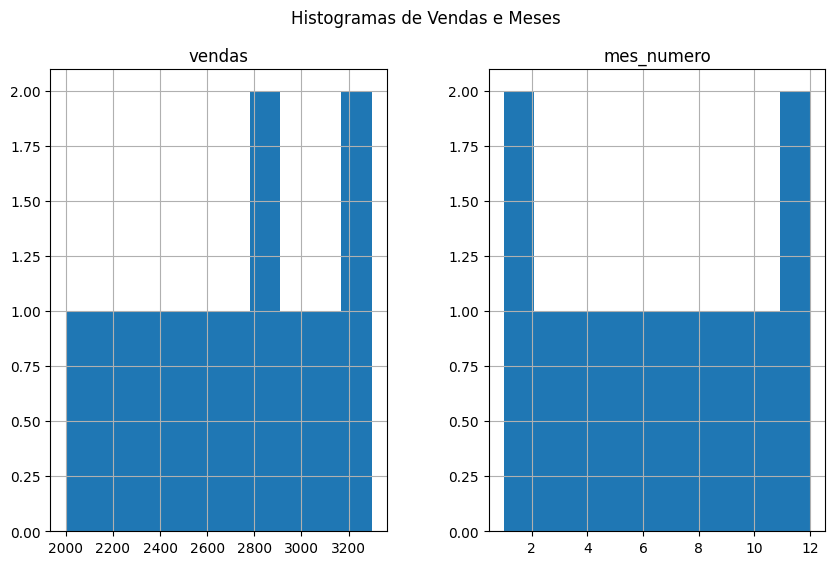

In [15]:
df_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()